<a href="https://colab.research.google.com/github/KimManSub/opencv_practice/blob/main/5_%EA%B0%9D%EC%B2%B4%ED%83%90%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-01-06 09:12:16--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1462729 (1.4M) [image/png]
Saving to: ‘like_lenna.png’

like_lenna.png      100%[===================>]   1.39M  --.-KB/s    in 0.05s   

2025-01-06 09:12:16 (26.0 MB/s) - ‘like_lenna.png’ saved [1462729/1462729]

원본 이미지 특징점 수: 500
회전된 이미지 특징점 수: 500
매칭된 특징점 수: 307

매칭 결과 (원본과 회전된 이미지 가로 배치):


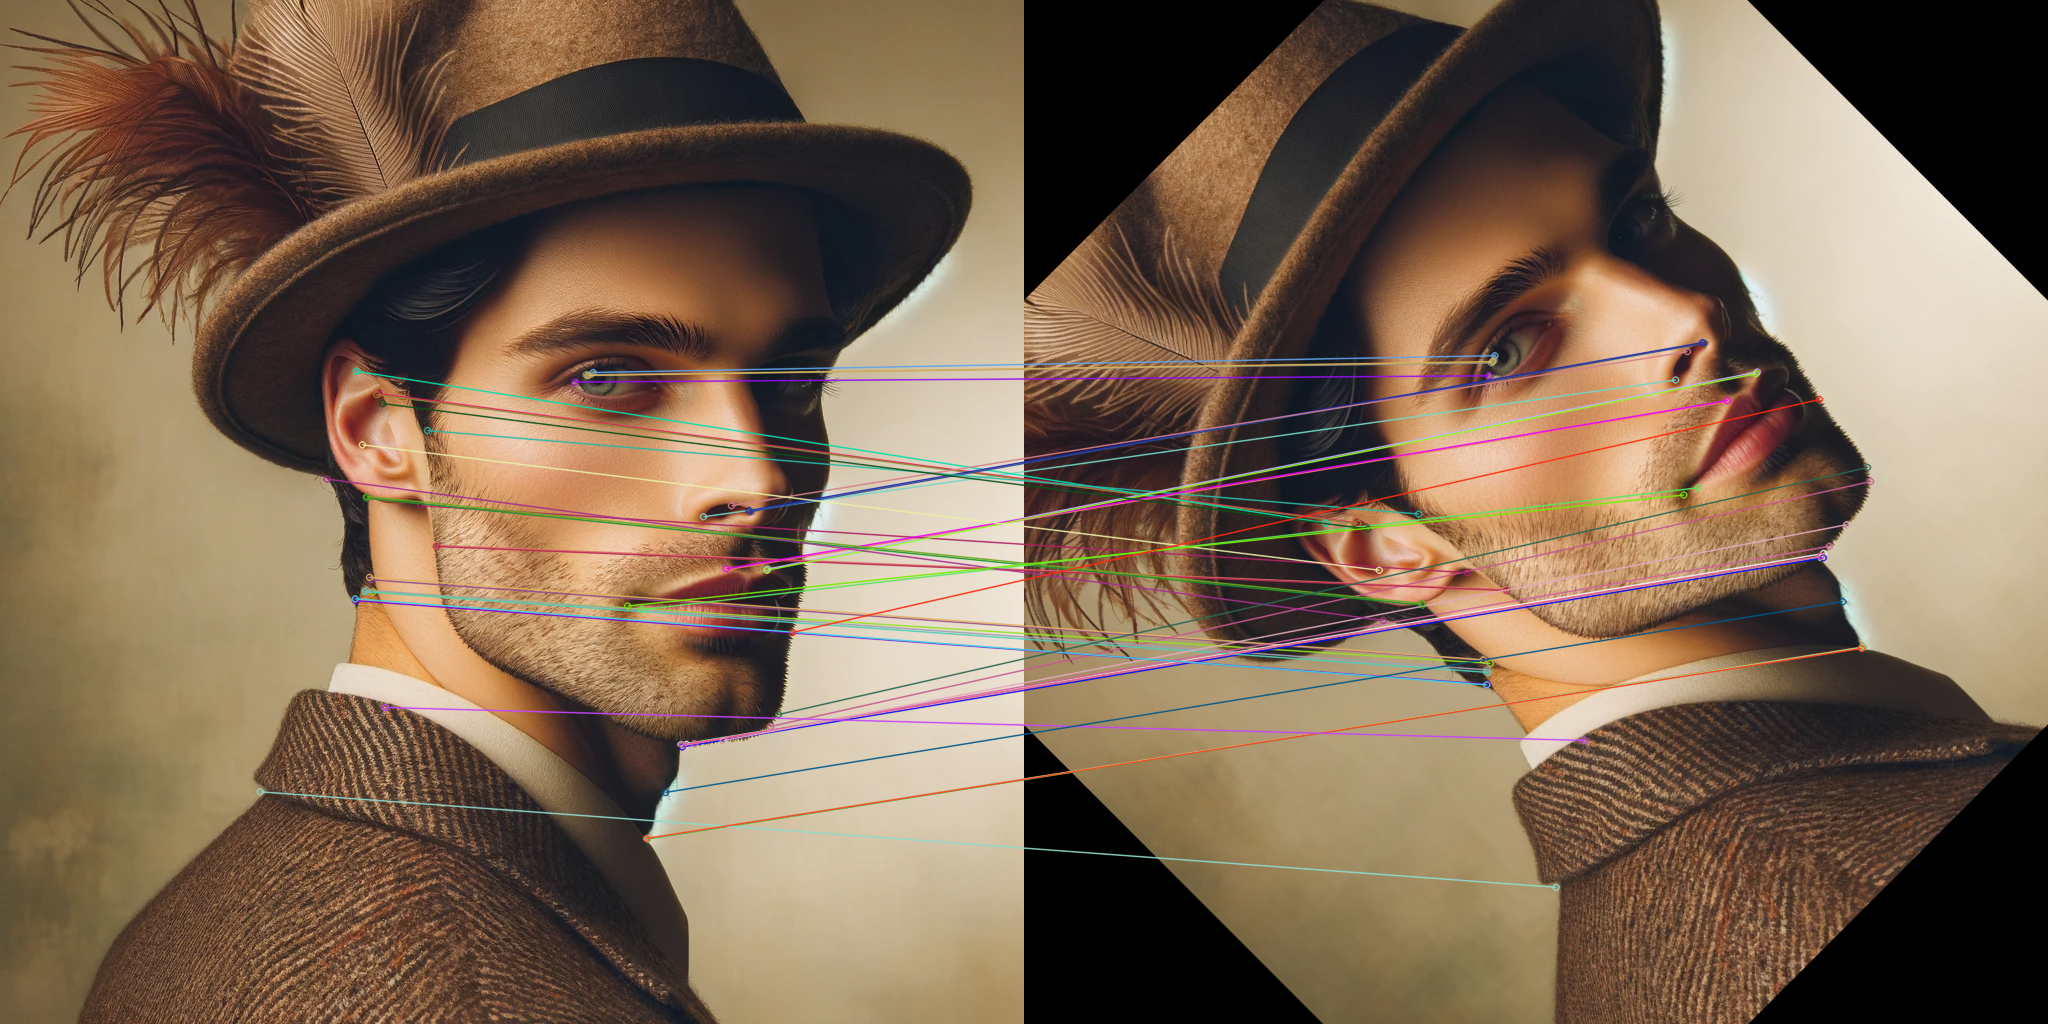

In [7]:
# 필요한 라이브러리 임포트
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Lenna 이미지 다운로드
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png -O like_lenna.png

# 특징 매칭 함수 정의
def detect_and_match_features(image_path):
    # 입력 이미지를 경로로부터 읽어오기
    img1 = cv2.imread(image_path)
    if img1 is None:
        print("이미지를 불러올 수 없습니다. 경로를 확인하세요.")
        return

    # 이미지 크기 확인
    rows, cols = img1.shape[:2]

    # 회전 행렬 생성 (중심 좌표, 회전 각도, 확대 배율)
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    img2 = cv2.warpAffine(img1, M, (cols, rows))  # 회전된 이미지 생성

    # 그레이스케일로 변환
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # ORB(Oriented FAST and Rotated BRIEF) 특징점 검출기 생성
    orb = cv2.ORB_create(
        nfeatures=500,         # 특징점 개수
        scaleFactor=1.2,       # 피라미드 스케일
        nlevels=8,             # 피라미드 레벨 수
        edgeThreshold=31,      # 에지 임계값
        firstLevel=0,          # 피라미드 첫 레벨
        WTA_K=2,               # 비트 문자열 비교 방식
        patchSize=31           # 패치 크기
    )

    # 원본 이미지와 회전된 이미지에서 특징점과 기술자 추출
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # BFMatcher(Brute-Force Matcher)로 특징 매칭 수행
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)  # 매칭 거리 기준으로 정렬

    # 원본 이미지와 회전된 이미지를 가로로 배치하여 매칭 시각화
    result = cv2.drawMatches(
        img1, kp1, img2, kp2, matches[:50], None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # 결과 출력
    print(f"원본 이미지 특징점 수: {len(kp1)}")
    print(f"회전된 이미지 특징점 수: {len(kp2)}")
    print(f"매칭된 특징점 수: {len(matches)}")

    # 코랩에서 이미지 표시
    print("\n매칭 결과 (원본과 회전된 이미지 가로 배치):")
    cv2_imshow(result)

# 이미지 경로 설정
lenna_image = 'like_lenna.png'

# 함수 실행
detect_and_match_features(lenna_image)
